In [1]:
import torch

In [2]:
a = 1e-12

In [3]:
type(a)

float

In [5]:
torch.tensor(a)

tensor(1.0000e-12)

In [20]:
a = torch.rand(2,9,786).float()

In [10]:
a.shape

torch.Size([2, 9, 786])

In [18]:
from torch import nn
ln = nn.LayerNorm(786, eps=1e-12).double()

In [19]:
a1 = ln(a)

In [12]:
a1.shape

torch.Size([2, 9, 786])

In [6]:
import torch
a = torch.tensor([1,1,0])
b = torch.tensor([0.5,0,1])

In [8]:
torch.max(b-a, torch.tensor ([0.0]))

tensor([0., 0., 1.])

In [5]:
b-a

tensor([-1, -1,  1])

In [9]:
b = torch.full([2, 5], 1.5)

In [10]:
b

tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000]])

In [2]:
from datasets import load_dataset

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                            split="train", # ["train", "test"]
                            cache_dir="~/.cache/huggingface",
                            )

/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/datasets/load.py:1486: FutureWarning: The repository for philipphager/baidu-ultr_baidu-mlm-ctr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/philipphager/baidu-ultr_baidu-mlm-ctr
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
train_dataset

Dataset({
    features: ['query_id', 'query_md5', 'query', 'query_length', 'n', 'url_md5', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'click', 'position', 'media_type', 'displayed_time', 'serp_height', 'slipoff_count_after_click', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length'],
    num_rows: 1779017
})

In [5]:
train_dataset['bm25'][0]

[37.58316421508789,
 36.20572280883789,
 56.07870864868164,
 70.85820007324219,
 52.38069152832031,
 47.444210052490234,
 51.77769088745117,
 41.325138092041016]

In [6]:
train_dataset['tf_idf'][0]

[25.439960479736328,
 20.177860260009766,
 41.639854431152344,
 35.50246810913086,
 38.605186462402344,
 25.439960479736328,
 39.025325775146484,
 22.449565887451172]

In [1]:
import torch
from src.bert import BertModel, BertReward
from transformers.models.bert.configuration_bert import BertConfig

config = BertConfig()

config.vocab = 100
config.num_labels = 1 # regression output
config.problem_type = "classification"
config.max_position_embeddings = 50

# if args.use_doc_feat:
# 	# self.config.doc_feat_len=0
# 	self.config.hidden_size+=12

reward_model = BertReward(config)

mname = "dfeat_un"
checkpoint = torch.load('../outputs/'+mname+'/checkpoint35.pth', map_location='cpu')

from datasets import load_dataset

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                            split="train", # ["train", "test"]
                            cache_dir="~/.cache/huggingface",
                            )

/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax/_src/xla_bridge.py", line 430, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax_plugins/xla_cuda12/__init__.py", line 78, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'
/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/datasets/load.py:1486: FutureWarning: The repository for philipphager/baidu-ultr_baidu-mlm-ctr 

In [3]:
from src.data import collate_fn
from torch.utils.data import DataLoader

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                        split="train", # ["train", "test"]
                        cache_dir="~/.cache/huggingface",
                        )

test_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                        split="test", # ["train", "test"]
                        cache_dir="~/.cache/huggingface",
                        )

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=64,
                                num_workers=2, pin_memory=True)
    
test_dataloader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=64,
                                num_workers=2)

In [4]:
for batch in iter(train_dataloader):
    feat = batch['query_document_embedding']
    pos_idx = batch['position']
    out = reward_model(inputs_embeds=feat, position_ids=pos_idx)
    bre

/local/home/ggbhatt/workspace/cf_ranking/cf_rank/src/data.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400412039/work/torch/csrc/utils/tensor_new.cpp:261.)
  column: torch.tensor(features, dtype=COLUMNS[column]["dtype"])
/local/home/ggbhatt/workspace/cf_ranking/cf_rank/src/data.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400412039/work/torch/csrc/utils/tensor_new.cpp:261.)
  column: torch.tensor(features, dtype=COLUMNS[column]["dtype"])


: 

In [1]:
feat

NameError: name 'feat' is not defined

In [7]:
a['']

dict_keys(['n', 'query_document_embedding', 'click', 'position', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length', 'mask'])

In [2]:
import torch
import os

In [4]:
torch.save(torch.tensor([1,2,3]),os.path.join('__pycache__','def'))

In [5]:
#from tsnecuda import TSNE
import torch
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE()

#a = torch.load(saved_path+model+'/saved_cls')
#b = torch.load(saved_path+model+'/saved_label')

In [13]:
import torch

def plot(model, dim=780, n_viz=1, title='GT_labels',saved_path='../cf_ranking/outputs/'):
    a = torch.load(saved_path+model+'/saved_cls')
    b = torch.load(saved_path+model+'/saved_label')

    a1 = tsne.fit_transform(a[0:n_viz].view(-1,dim))
    #plt.figure(figsize=(8, 6))

    fig, ax = plt.subplots(1, 3, figsize=(24,8), dpi=220)

    scatter = []

    for i in ax:
        scatter.append(i.scatter(a1[:, 0], a1[:, 1], c=b[0:n_viz].view(-1), cmap='jet', s=50, alpha=0.7))

    # Add a colorbar
        plt.colorbar(scatter[-1])

        i.set_title("t-SNE Visualization of "+title)
        #i.xlabel("t-SNE Component 1")
        #i.ylabel("t-SNE Component 2")
        i.plot()
        i.set_aspect('equal')

    plt.savefig('test.jpg', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_109499/2011973477.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/201197

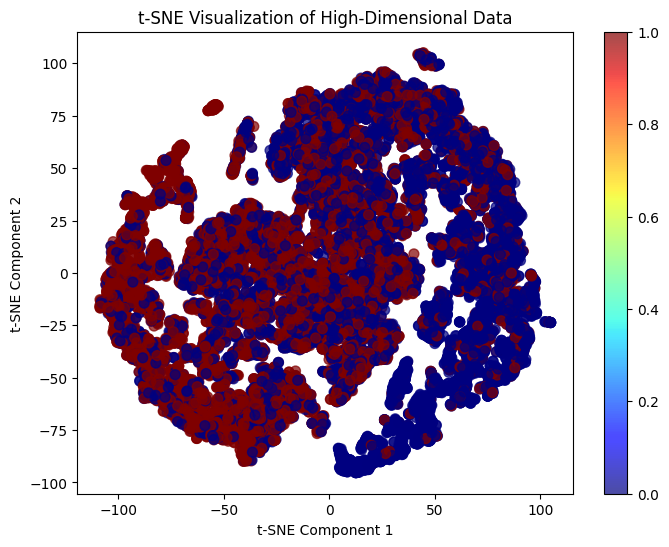

In [20]:
model='sr_df'
plot(model,n_viz=50)

In [ ]:
model='ep40_drp15_wd4'
plot(model, dim=768, n_viz=50, saved_path='../outputs/')

In [7]:
model='sr_nodf'
#plot(model, dim=768)

/tmp/ipykernel_92741/1131402897.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load(saved_path+model+'/saved_cls')
/tmp/ipykernel_92741/1131402897.py:5: Futur

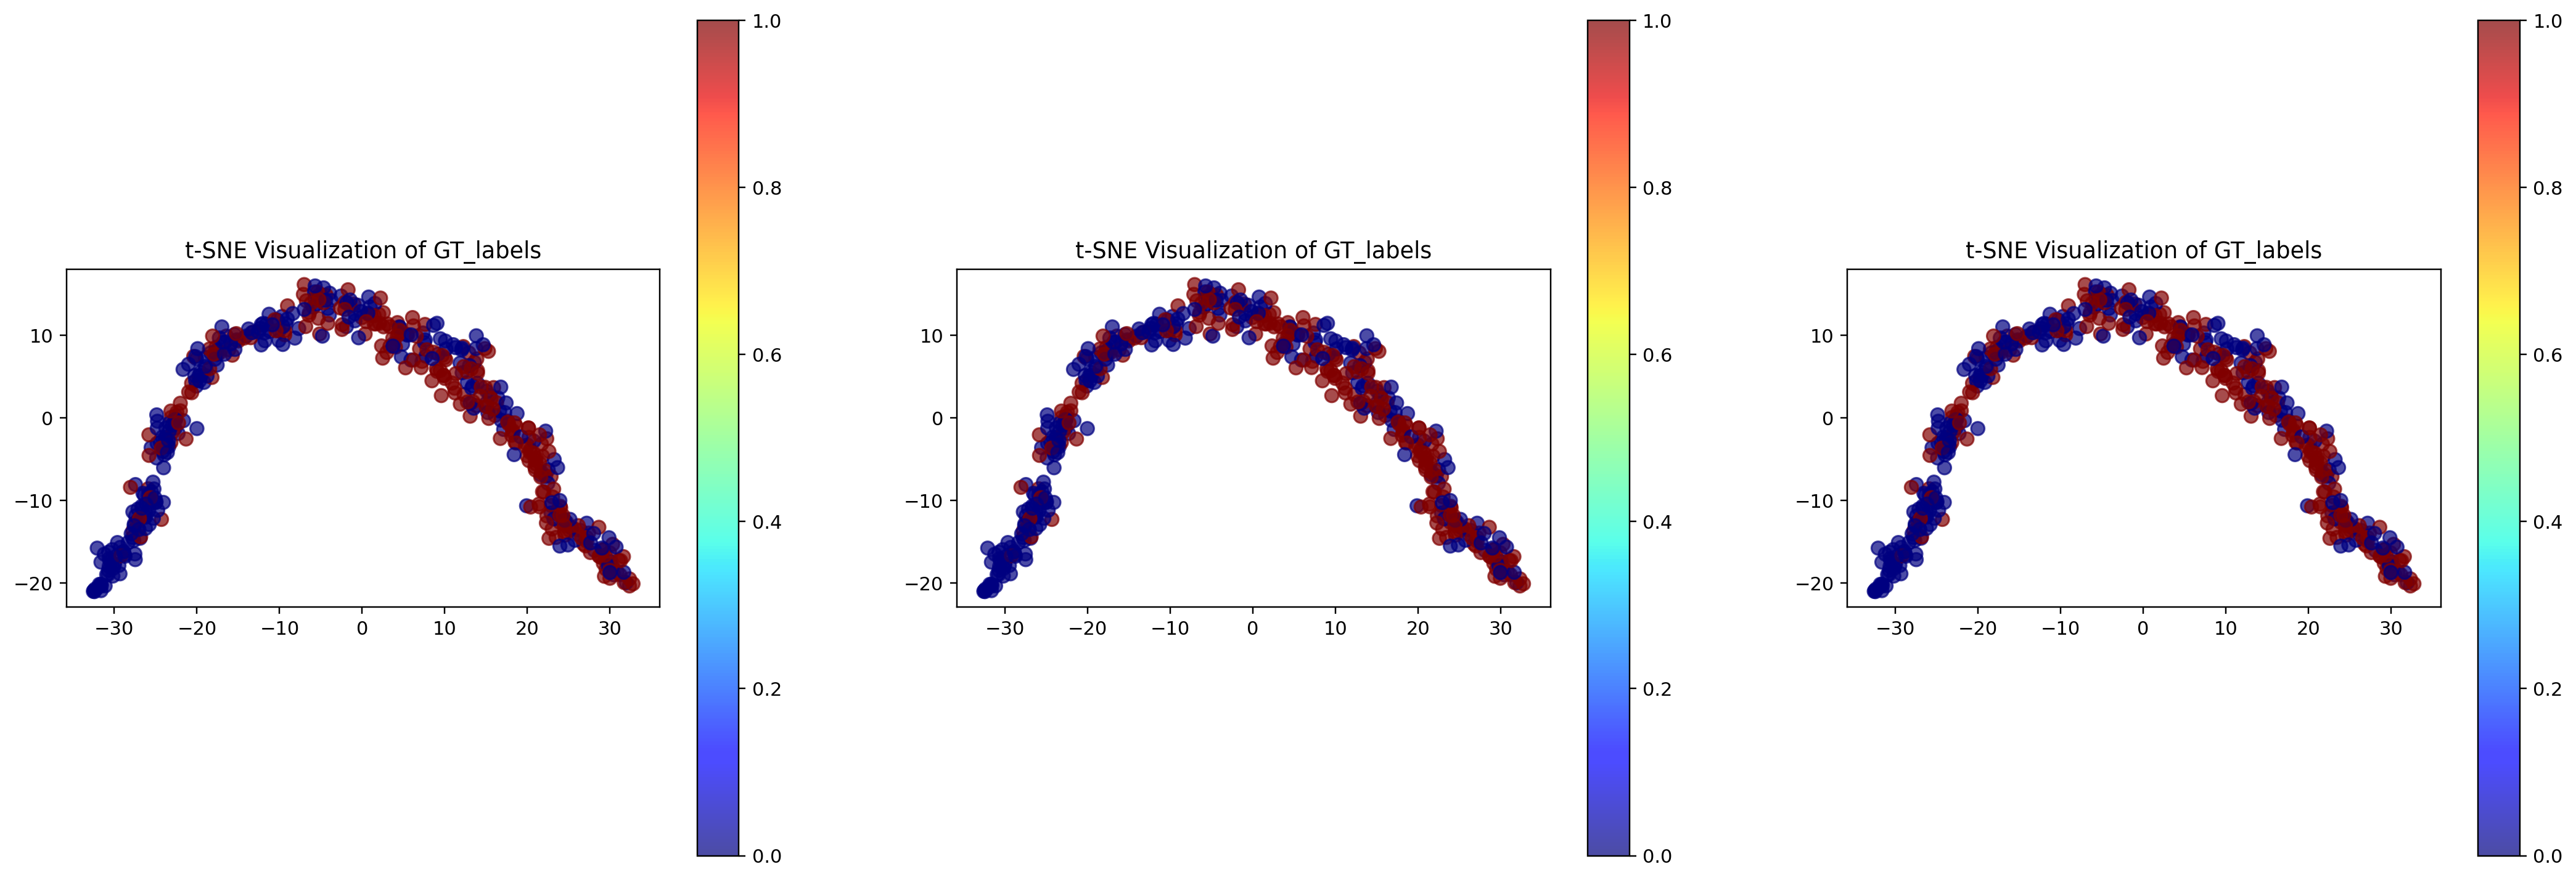

In [14]:
#fig, ax = plt.subplots(1, 3, figsize=(14,6), dpi=220)

plot(model=model,dim=768)

In [5]:
ax[0].scatter

<bound method Axes.scatter of <Axes: >>

In [17]:
a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
b = torch.load('../cf_ranking/outputs/'+model+'/saved_label')

/tmp/ipykernel_109499/2676748144.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/267674

In [18]:
a.shape

torch.Size([290, 512, 780])

/tmp/ipykernel_109499/2011973477.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/201197

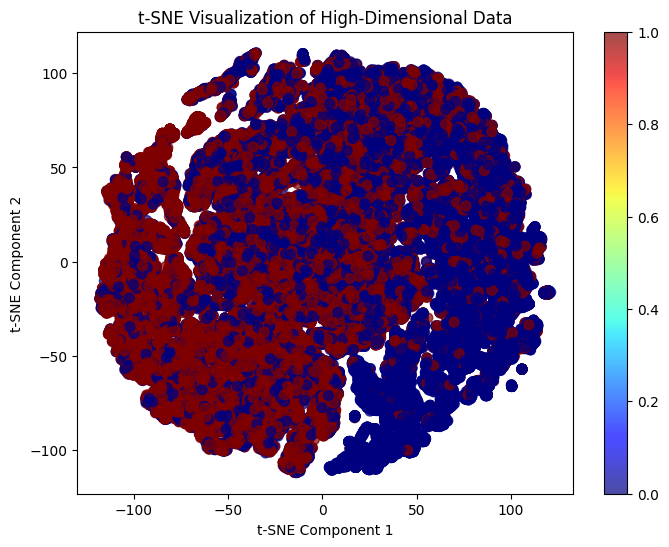

In [21]:
model='sr_df'
plot(model,n_viz=200)

In [1]:
from datasets import load_dataset
from torch.utils.data import DataLoader
from bbm.src.model import CrossEncoder
from src.data import collate_fn
import numpy as np
import torch
import pandas as pd
from collections import defaultdict
import tqdm


/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax/_src/xla_bridge.py", line 430, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax_plugins/xla_cuda12/__init__.py", line 78, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'


In [3]:
batch_size = 8
dataset = load_dataset(
    "philipphager/baidu-ultr_uva-mlm-ctr",
    name="clicks",
    split="test",
    trust_remote_code=True,
)

click_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
    num_workers=0,
)

# click_loader1 = DataLoader(
#     dataset,
#     batch_size=batch_size,
#     collate_fn=collate_click_fn,
# )

model = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_naive-pointwise")
model1 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_dla")
model2 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_ips-listwise")
model4 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_twotower")

Some weights of the model checkpoint at philipphager/baidu-ultr_uva-bert_dla were not used when initializing CrossEncoder: {('propensities', 'embedding')}
- This IS expected if you are initializing CrossEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CrossEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at philipphager/baidu-ultr_uva-bert_twotower were not used when initializing CrossEncoder: {('propensities', 'embedding')}
- This IS expected if you are initializing CrossEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining mod

In [11]:
len(click_loader)/8

9280.25

In [5]:
batch1 = next(iter(click_loader))

new_batch = {'tokens':batch1['tokens'].reshape(batch_size*9,128),
             'attention_mask':batch1['attention_mask'].reshape(batch_size*9,128),
             'token_types':batch1['token_types'].reshape(batch_size*9,128)}
out_c = model(new_batch)
out_c1 = model1(new_batch)
out_c2 = model(new_batch)

# Use model only for relevance prediction, e.g., for evaluation:
# out_r = model.predict_relevance(batch2)

In [6]:
m = []

for i in range(4):
    m+=[1]

In [7]:
m

[1, 1, 1, 1]

In [31]:
pred = np.array(out_c.click)
avg_click = pred.reshape(16,9)

In [34]:
batch1['click_mod'] = avg_click

In [56]:
batch_out = {}
for i,j in batch1.items():
    batch_out[i] = j.tolist()

In [57]:
df = pd.DataFrame(batch_out)
df.to_feather('out.feather')

In [12]:
batch_out = defaultdict(lambda: [])
for idx, batch in tqdm.tqdm(enumerate(click_loader)):
    #if idx < 5000:
    #    continue
    #print(idx)
    row,col = batch['tokens'].shape[0], batch['tokens'].shape[1] 
    new_batch = {'tokens':batch['tokens'].reshape(row*col,128),
             'attention_mask':batch['attention_mask'].reshape(row*col,128),
             'token_types':batch['token_types'].reshape(row*col,128)}
    out_c = model(new_batch)
    pred = np.array(out_c.click).reshape(row,col)
    batch['click_mod'] = pred

    for i,j in batch.items():
        batch_out[i].extend(j.tolist())
        #batch_out['click_mod'].extend(pred.tolist())
    #if idx > 10:
    #    break
df = pd.DataFrame(batch_out)
df.to_feather('out.feather')

0it [00:00, ?it/s]

215it [02:18,  1.85it/s]

In [1]:
import pandas as pd

In [20]:
a = pd.read_feather('../../data/naive-pointwise_train1.feather')

In [21]:
a.keys()

Index(['tokens', 'token_types', 'attention_mask', 'n',
       'query_document_embedding', 'click', 'position', 'bm25', 'bm25_title',
       'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short',
       'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length',
       'title_length', 'abstract_length', 'mask', 'click_mod'],
      dtype='object')

In [23]:
a['click'][85000]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
27796*8

222368

In [58]:
pos = torch.tensor(list(range(10))).float()
delta = 1.0
weight = torch.tensor(10*[delta])
torch.multinomial(pos, 10, replacement=False)

tensor([8, 9, 7, 6, 5, 4, 2, 3, 1, 0])

In [71]:
int(len(pos)*0.6)

6

In [275]:
def sample_without_replacement_with_prob(delta, pos):
    weights = torch.ones_like(pos)
    remaining_idx = []

    #print('pos', pos)

    if delta*len(pos)<1:
        idx = torch.multinomial(pos, len(pos), replacement=False)
        return pos[idx]
    
    delta_sample_idx = torch.multinomial(pos,int(delta*len(pos)), replacement=False)
    #print ('retaining', pos[delta_sample_idx])
    weights[delta_sample_idx] = 0
    #remaining_idx = len(pos) - int(delta*len(pos))

    for i,j in enumerate(pos):
        if j not in pos[delta_sample_idx]:
            remaining_idx.append(i)

    #print ('perturbing', remaining_idx)

    d_pos = pos.clone()

    for i in remaining_idx:
        # Normalize weights to ensure they sum to 1
        normalized_weights = weights / weights.sum()

        # Sample one index based on normalized weights
        if weights.sum() == 0:
            return d_pos
        
        sampled_index = torch.multinomial(normalized_weights, 1).item()

        print (i, sampled_index, normalized_weights)

        d_pos[sampled_index] = pos[i]

        # Set the weight of the sampled index to 0 for the next iteration
        weights[sampled_index] = 0

    return d_pos

In [280]:
pos = torch.tensor([2,4,5,7,8,91,21,1]).float()
delta = 1.0
sample_without_replacement_with_prob(delta=delta,pos=pos)

pos tensor([ 2.,  4.,  5.,  7.,  8., 91., 21.,  1.])
retaining tensor([ 1.,  2., 91., 21.,  8.,  7.,  5.,  4.])
perturbing []


tensor([ 2.,  4.,  5.,  7.,  8., 91., 21.,  1.])

In [221]:
int(0.1*5)

0

In [201]:
pos[[1,3]]

tensor([4., 7.])

In [278]:
torch.multinomial(torch.tensor([1,42,3,4]).float(),4, replacement=False)

tensor([3, 1, 2, 0])

In [100]:
pos = torch.tensor(list(range(10))).float()

In [1]:
pwd

'/local/home/ggbhatt/workspace/cf_ranking/cf_rank'

In [ ]:
import pandas as pd
import torch
import glob
import os
from torch.utils.data import Dataset, DataLoader

class FeatherDataset(Dataset):
    def __init__(self, data_path, transform=None):

        all_files = glob.glob(os.path.join(data_path,'*'))
        
        self.data = pd.read_feather(feather_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx].to_dict()  # Convert row to dict

        # Apply transformations if any
        if self.transform:
            sample = self.transform(sample)

        return sample